In [22]:
# !pip install gymnasium 'gymnasium[atari]' 'gymnasium[accept-rom-license]'
# !pip install gym 'gym[atari]' 'gym[accept-rom-license]'

In [23]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt

In [ ]:
env = gym.make("GymV26Environment-v0", env_id="ALE/MsPacman-ram-v5")

ACTION_SPACE_SIZE = env.action_space.n
# state_space_size = env.observation_space.n

EPISODES_NUM = 2000
TIMESTEPS_NUM = 200

ALPHA = 0.2
GAMMA = 0.99
GAMMA_DECAY = 0.04

EXPLORATION_RATE = 1
MAX_EXPLORATION_RATE = 1
MIN_EXPLORATION_RATE = 0.01
EXPLORATION_RATE_DECAY = 0.05


# q_table = np.zeros((num_episodes * max_steps_per_episode, action_space_size))
state, info = env.reset()
q_table = dict()

In [ ]:
def get_hash(state) -> int:
    return hash(tuple(state))
def set_state(action, state, reward):
    key = get_hash(state)

    if key not in q_table:
        q_table[key] = np.zeros(ACTION_SPACE_SIZE)
        q_table[key][action] = reward
        return

    q_table[key][action] += reward
    return
def get_max_action(state):
    key = get_hash(state)

    if key not in q_table:
        q_table[key] = np.zeros(ACTION_SPACE_SIZE)
        return env.action_space.sample()

    return np.argmax(q_table[key])
def get_max_state_reward(state):
    key = get_hash(state)

    if key not in q_table:
        q_table[key] = np.zeros(ACTION_SPACE_SIZE)
        return 0.0

    return np.max(q_table[key])
def get_reward_by_action_and_state(state, action):
    key = get_hash(state)

    if key not in q_table:
        q_table[key] = np.zeros(ACTION_SPACE_SIZE)
        return 0.0

    return q_table[key][action]

In [ ]:
def train():
    rewards = []
    mean_rewards_per_episodes = []

    global EXPLORATION_RATE
    for episode in range(EPISODES_NUM):
        state, info = env.reset()
        total_reward = 0

        for step in range(TIMESTEPS_NUM):
            exp_tradeoff = random.uniform(0, 1)

            if exp_tradeoff > EXPLORATION_RATE:
                action = get_max_action(state)
            else:
                action = env.action_space.sample()
            new_state, reward, terminated, truncated, info = env.step(action)

            new_state_max_reward = get_max_state_reward(new_state)
            current_state_reward = get_reward_by_action_and_state(state, action)
            discounted_reward = ALPHA * (reward + GAMMA * new_state_max_reward - current_state_reward)

            set_state(action, state, discounted_reward)

            total_reward += reward
            state = new_state
            done = terminated or truncated
            if done:
                break

        # print('Episode: {}, reward: {}'.format(episode, total_reward))

        EXPLORATION_RATE = MIN_EXPLORATION_RATE + (MAX_EXPLORATION_RATE - MIN_EXPLORATION_RATE) * np.exp(-EXPLORATION_RATE_DECAY * episode)

        rewards.append(total_reward)
        mean_rewards_per_episodes.append(sum(rewards) / len(rewards))

    mean = sum(rewards) / len(rewards)

    return [rewards, mean_rewards_per_episodes, mean]

In [ ]:
mean_rewards_per_discount_rate = []
discount_rates = []
GAMMA = 0.99

while GAMMA >= 0:
    print('Discount rate: ', GAMMA)
    rewards, mean_rewards_per_episodes, mean = train()
    mean_rewards_per_discount_rate.append(mean)
    discount_rates.append(GAMMA)
    GAMMA -= GAMMA_DECAY

    q_table.clear()



In [ ]:
plt.plot(discount_rates, mean_rewards_per_discount_rate)

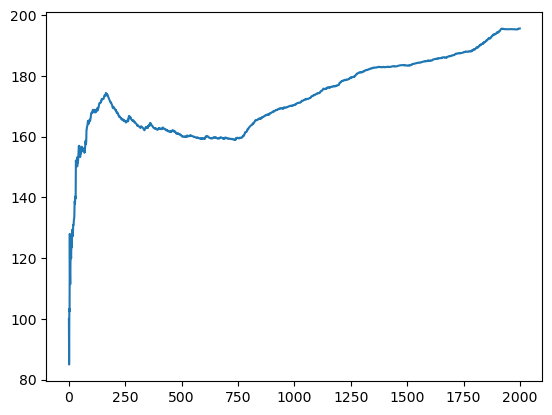

In [60]:
q_table = dict()
GAMMA = 0.01
rewards, mean_rewards_per_episodes, mean = train()

plt.plot(mean_rewards_per_episodes)

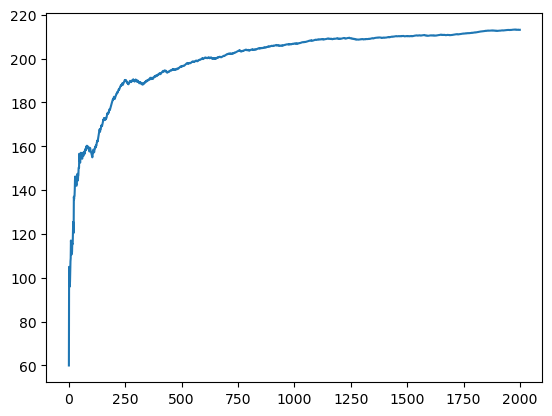

In [61]:
q_table = dict()
GAMMA = 0.99
rewards, mean_rewards_per_episodes, mean = train()

plt.plot(mean_rewards_per_episodes)